In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd

In [2]:
train_one = pd.read_csv("data/train3.csv")
test_one = pd.read_csv("data/test3.csv")
train_merge = pd.read_csv("data/train_merged.csv")
test_merge = pd.read_csv("data/test_merged.csv")

In [3]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

In [4]:
train_merge['등록차량수'] = train['등록차량수']

In [5]:
tmp = train_merge.copy()
tmp.loc[tmp['store임대료count'].isin(range(1,11)),'store임대료count'] = 1
tmp.loc[tmp['store임대료count'].isin(range(11,20)),'store임대료count'] = 2
tmp.loc[tmp['store임대료count'].isin(range(20,100)),'store임대료count'] = 3

train_one['store개수'] = tmp['store임대료count']
train_one['store개수'] = train_one['store개수'].apply(lambda x : str(x))

In [6]:
tmp = test_merge.copy()
tmp.loc[tmp['store임대료count'].isin(range(1,11)),'store임대료count'] = 1
tmp.loc[tmp['store임대료count'].isin(range(11,20)),'store임대료count'] = 2
tmp.loc[tmp['store임대료count'].isin(range(20,100)),'store임대료count'] = 3

test_one['store개수'] = tmp['store임대료count']
test_one['store개수'] = test_one['store개수'].apply(lambda x : str(x))

In [9]:
def func3(x,dic):
    for i in dic.keys():
        if len(dic[i]) == len(x):
            if all(dic[i] == x):
                return i


train.loc[train['공급유형'].isin(['영구임대', '행복주택']),'공급유형'] = '영구/행복'
test.loc[test['공급유형'].isin(['영구임대', '행복주택']),'공급유형'] = '영구/행복'

train.loc[train['공급유형'].isin(['공공임대(10년)', '공공임대(5년)']),'공급유형'] = '공공임대(단기)'
test.loc[test['공급유형'].isin(['공공임대(10년)', '공공임대(5년)']),'공급유형'] = '공공임대(단기)'

no_shop = train[train['공급유형']!='임대상가']
uniq = np.reshape(no_shop['공급유형'].unique(),(7,1))

dic = dict(enumerate(uniq))
dic[8] = ['공공임대(단기)', '국민임대']
dic[9] = ['장기전세', '국민임대', '영구/행복']
dic[10] = ['국민임대', '영구/행복']
dic[11] = ['공공임대(단기)', '공공임대(분납)']
dic[12] = ['공공분양', '공공임대(단기)', '공공임대(분납)']
dic[13] = ['공공임대(50년)', '영구/행복']
dic[14] = ['장기전세', '공공임대(단기)', '공공임대(분납)']

dic1 = dict()
for i in dic.keys():
    val = train.loc[train['공급유형'].isin(dic[i]),'임대보증금'].mean()
    dic1[i] = val


no_shop = train[train['공급유형']!='임대상가']
sample = pd.DataFrame(no_shop.groupby('단지코드')['공급유형'].unique()).reset_index()
sample['cluster'] = sample['공급유형'].apply(lambda x : func3(x,dic))
sample['cluster'] = sample['cluster'].apply(lambda x: int(x))
train = pd.merge(train,sample[['단지코드','cluster']],on='단지코드',how='left')
train['cluster_임대보증금'] = train['cluster'].apply(lambda x: dic1[x])
train = train.drop(['공급유형'],axis=1)


no_shop = test[test['공급유형']!='임대상가']
sample = pd.DataFrame(no_shop.groupby('단지코드')['공급유형'].unique()).reset_index()
sample['cluster'] = sample['공급유형'].apply(lambda x : func3(x,dic))
test = pd.merge(test,sample[['단지코드','cluster']],on='단지코드',how='left')
test['cluster_임대보증금'] = test['cluster'].apply(lambda x: dic1[x])
test = test.drop(['공급유형'],axis=1)

In [10]:
tmp = train[['단지코드','cluster_임대보증금']].drop_duplicates().reset_index(drop=True)
train_one['cluster_임대보증금'] = tmp['cluster_임대보증금']

In [11]:
tmp = test[['단지코드','cluster_임대보증금']].drop_duplicates().reset_index(drop=True)
test_one['cluster_임대보증금'] = tmp['cluster_임대보증금']

In [12]:
print(train_one.shape)
print(test_one.shape)

(414, 52)
(147, 51)


In [13]:
train_one.columns

Index(['단지코드', '지하철역', '버스정류장', '등록차량수', '연면적', '위도', '경도', '총인구수', '세대당_인구',
       '공가수_비율', '세대당_가능주차면수', '0~19 인구수', '20~39 인구수', '40~69 인구수',
       '70세이상 인구수', 'sub_0', 'sub_1', 'sub_dist_0', 'sub_dist_1', 'sub_dist_2',
       'cluster', 'apt임대료min', 'apt임대료25%', 'apt임대료50%', 'apt임대료75%',
       'apt임대료max', 'apt임대보증금min', 'apt임대보증금25%', 'apt임대보증금50%', 'apt임대보증금75%',
       'apt임대보증금max', 'store임대료min', 'store임대료25%', 'store임대료50%',
       'store임대료75%', 'store임대료max', 'store임대보증금min', 'store임대보증금25%',
       'store임대보증금50%', 'store임대보증금75%', 'store임대보증금max', 'apt전용면적min',
       'apt전용면적25%', 'apt전용면적50%', 'apt전용면적75%', 'apt전용면적max', 'store전용면적mean',
       'store전용면적std', 'store_count_0.0', 'store_count_1.0', 'store_count_2.0',
       'cluster_임대보증금'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae

from catboost import CatBoostRegressor

In [15]:
X = train_one.drop(['등록차량수','단지코드'],axis=1)
y = train_one['등록차량수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2021,shuffle=True)
cat_features = ['store개수']

cb = CatBoostRegressor(random_state=2021,verbose=False,loss_function='MAE',cat_features=cat_features).fit(X_train, y_train)
pred = cb.predict(X_test)

mae(pred,y_test) 

121.5772557357225

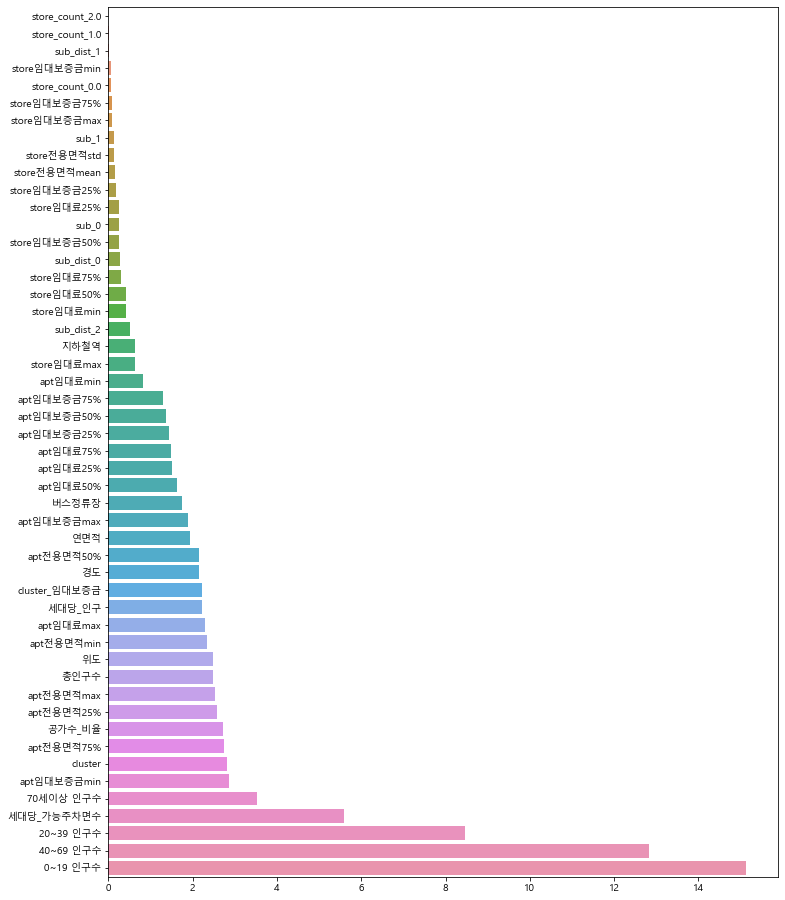

In [16]:
plt.figure(figsize=(12,16))
sns.barplot(y = X_train.columns[np.argsort(cb.feature_importances_)], x = list(cb.feature_importances_[np.argsort(cb.feature_importances_)]))

In [17]:
real_x = test_one.drop('단지코드',axis=1)
real_y = cb.predict(real_x)

In [18]:
def myfunc():
    cb = pd.read_csv("0713_cb.csv")
    cb = cb.loc[-cb['code'].isin(['C2675', 'C2335', 'C1327']),:].reset_index(drop=True)
    return cb

res = myfunc()
mae(real_y,res['num'])

60.74413631684578